In [1]:
import pandas as pd
import os
import re
from matplotlib import pyplot as plt

In [2]:
DATA_FOLDER_PATH = os.getcwd() + '/data/KS VERI/KS10/'

In [3]:
FILE_NAMES = ['KS10 SENSOR-1 ISI (Room Sensor).xlsx',
              'KS10 SENSOR-2 ISI (Room Sensor).xlsx']

In [4]:
PATHS = [DATA_FOLDER_PATH + file_name for file_name in FILE_NAMES]

In [5]:
SENSOR_I_DF = pd.read_excel(PATHS[0], sheet_name='KS10 SENSOR-1 ISI (4)')
SENSOR_I_DF = SENSOR_I_DF[SENSOR_I_DF['Date Time'].dt.year >= 2023]

SENSOR_II_DF = pd.read_excel(PATHS[1], sheet_name='KS10 SENSOR-2 ISI (4)')
SENSOR_II_DF = SENSOR_II_DF[SENSOR_II_DF['Date Time'].dt.year >= 2023]

In [6]:
def get_INNER_TEMP(sensor_number: int,
                   date_time: str) -> float:
    """
    Get the closest inner temperature value to the given date time.
    
    Args:
        sensor_number: The sensor number.
        date_time: The date time.
    
    Returns:
        The inner temperature value.
    """
    
    if sensor_number > 2 or sensor_number < 1:
        raise ValueError('sensor_number must be 1 or 2.')
    
    # check if the date time is in the correct format with regex
    if not re.match(r'\d{2}\.\d{2}\.\d{4} \d{2}:\d{2}:\d{2}', date_time):
        raise ValueError('date_time must be in the format of dd.mm.yyyy hh:mm:ss')
    
    if sensor_number == 1:
        sensor_df = SENSOR_I_DF
    else:
        sensor_df = SENSOR_II_DF
        
    # convert the date time to datetime object
    date_time = pd.to_datetime(date_time, dayfirst=True)
        
    # find the closest date time
    # first find the rows that are have the same date as the given date time
    # then find the 1-hour interval that is closest to the given date time
    search_df = sensor_df[sensor_df['Date Time'].dt.date == date_time.date()]
    if search_df.empty:
        print('There is no data for the given date. {} in sensor {}.'.format(date_time, sensor_number))
        search_df = sensor_df
    
    closest_date_time = min(search_df['Date Time'],
                            key=lambda x: abs(x - date_time))
    
    # get the inner temperature value
    inner_temp = search_df[search_df['Date Time'] == closest_date_time]['KN-2 SENSOR-' + str(sensor_number) + ' ISI'].values[0]
    
    return inner_temp

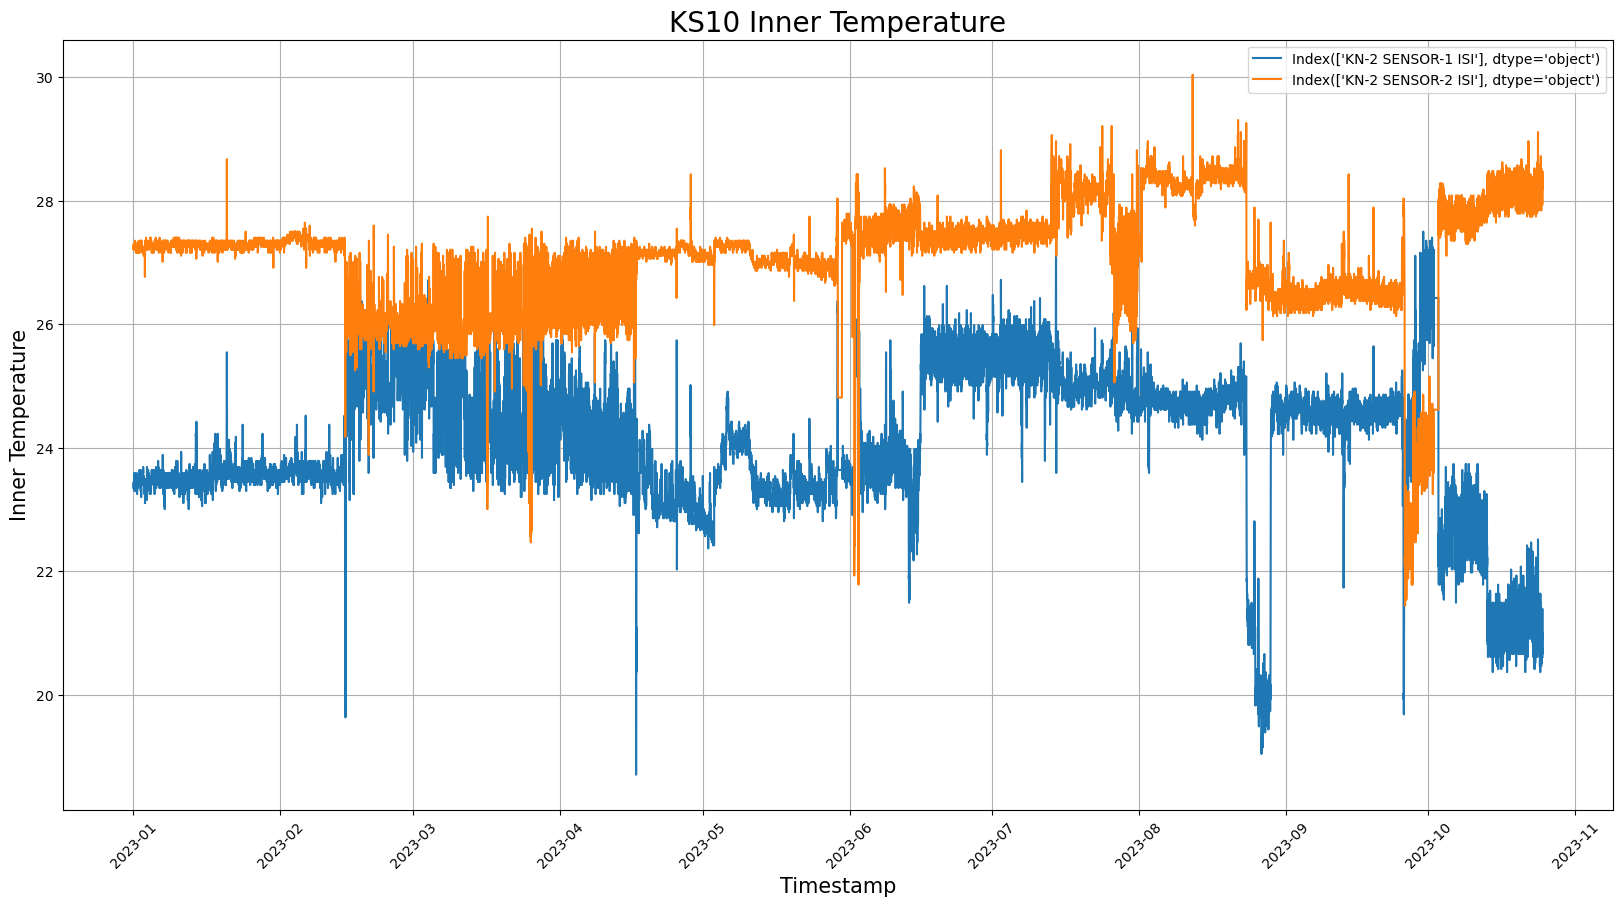

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(SENSOR_I_DF['Date Time'],
         SENSOR_I_DF[SENSOR_I_DF.columns[1:]], 
         label=SENSOR_I_DF.columns[1:])
plt.plot(SENSOR_II_DF['Date Time'],
         SENSOR_II_DF[SENSOR_II_DF.columns[1:]],
         label=SENSOR_II_DF.columns[1:])

plt.xlabel('Timestamp', fontsize=15)
plt.ylabel('Inner Temperature', fontsize=15)
plt.title('KS10 Inner Temperature', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [8]:
START_TIME = pd.to_datetime('2023-01-01 00:00:00')
END_TIME = pd.to_datetime(max(SENSOR_I_DF['Date Time'].max(), SENSOR_II_DF['Date Time'].max()))
TIMESTAMPS = [str(time) for time in pd.date_range(START_TIME, END_TIME, freq='5min')]

In [9]:
ESTIMATED_SENSOR_TEMPS = pd.DataFrame(columns=['Timestamp', 'Sensor I', 'Sensor II'])

ESTIMATED_SENSOR_TEMPS['Timestamp'] = TIMESTAMPS

ESTIMATED_SENSOR_TEMPS

,Timestamp,Sensor I,Sensor II
0,2023-01-01 00:00:00,NaN,NaN
1,2023-01-01 00:05:00,NaN,NaN
2,2023-01-01 00:10:00,NaN,NaN
3,2023-01-01 00:15:00,NaN,NaN
4,2023-01-01 00:20:00,NaN,NaN
...,...,...,...
85559,2023-10-25 01:55:00,NaN,NaN
85560,2023-10-25 02:00:00,NaN,NaN
85561,2023-10-25 02:05:00,NaN,NaN
85562,2023-10-25 02:10:00,NaN,NaN


In [10]:
for i, timestamp in enumerate(TIMESTAMPS):
    year = timestamp.split(' ')[0].split('-')[0]
    month = timestamp.split(' ')[0].split('-')[1]
    day = timestamp.split(' ')[0].split('-')[2]
    time = timestamp.split(' ')[1]
    timestamp = str(day) + '.' + str(month) + '.' + str(year) + ' ' + str(time)
    
    print(timestamp)
    ESTIMATED_SENSOR_TEMPS['Sensor I'][i] = get_INNER_TEMP(1, timestamp)
    ESTIMATED_SENSOR_TEMPS['Sensor II'][i] = get_INNER_TEMP(2, timestamp)

01.01.2023 00:00:00
01.01.2023 00:05:00
01.01.2023 00:10:00
01.01.2023 00:15:00
01.01.2023 00:20:00
01.01.2023 00:25:00
01.01.2023 00:30:00
01.01.2023 00:35:00
01.01.2023 00:40:00
01.01.2023 00:45:00
01.01.2023 00:50:00
01.01.2023 00:55:00
01.01.2023 01:00:00
01.01.2023 01:05:00
01.01.2023 01:10:00
01.01.2023 01:15:00
01.01.2023 01:20:00
01.01.2023 01:25:00
01.01.2023 01:30:00
01.01.2023 01:35:00
01.01.2023 01:40:00
01.01.2023 01:45:00
01.01.2023 01:50:00
01.01.2023 01:55:00
01.01.2023 02:00:00
01.01.2023 02:05:00
01.01.2023 02:10:00
01.01.2023 02:15:00
01.01.2023 02:20:00
01.01.2023 02:25:00
01.01.2023 02:30:00
01.01.2023 02:35:00
01.01.2023 02:40:00
01.01.2023 02:45:00
01.01.2023 02:50:00
01.01.2023 02:55:00
01.01.2023 03:00:00
01.01.2023 03:05:00
01.01.2023 03:10:00
01.01.2023 03:15:00
01.01.2023 03:20:00
01.01.2023 03:25:00
01.01.2023 03:30:00
01.01.2023 03:35:00
01.01.2023 03:40:00
01.01.2023 03:45:00
01.01.2023 03:50:00
01.01.2023 03:55:00
01.01.2023 04:00:00
01.01.2023 04:05:00


In [11]:
ESTIMATED_SENSOR_TEMPS

,Timestamp,Sensor I,Sensor II
0,2023-01-01 00:00:00,23.3462,27.2532
1,2023-01-01 00:05:00,23.3462,27.2532
2,2023-01-01 00:10:00,23.3462,27.2532
3,2023-01-01 00:15:00,23.3462,27.2532
4,2023-01-01 00:20:00,23.3462,27.2532
...,...,...,...
85559,2023-10-25 01:55:00,21.0017,28.1817
85560,2023-10-25 02:00:00,21.0017,28.1817
85561,2023-10-25 02:05:00,21.0017,28.1817
85562,2023-10-25 02:10:00,21.0017,28.1817


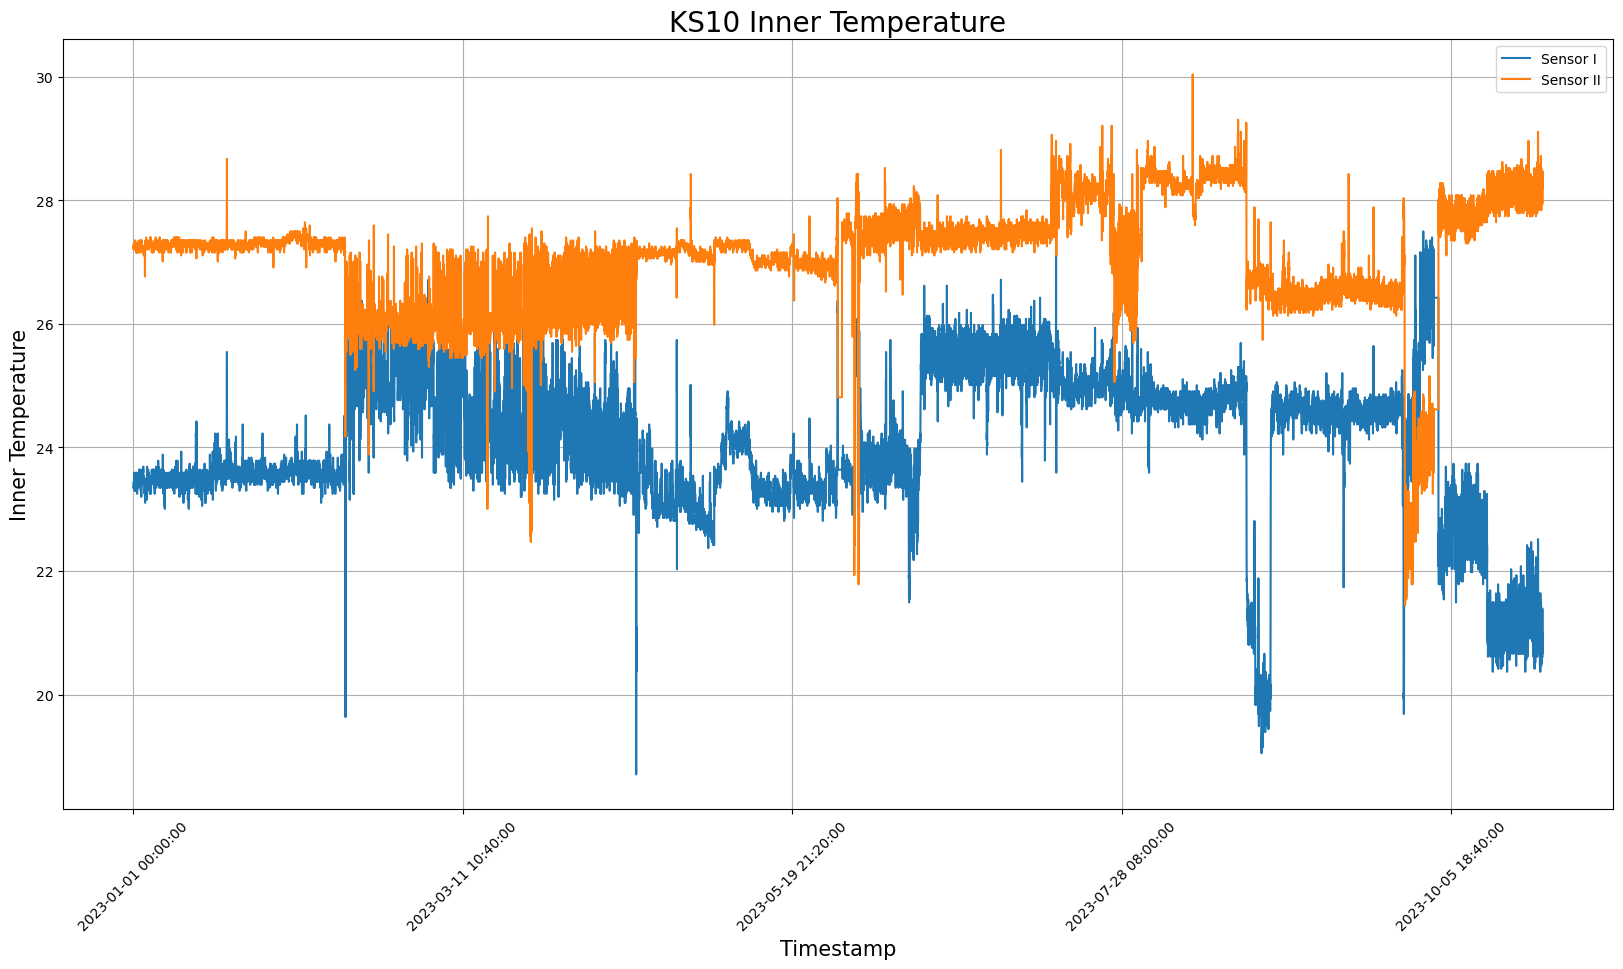

In [12]:
ESTIMATED_SENSOR_TEMPS.plot(x='Timestamp', y=['Sensor I', 'Sensor II'], figsize=(20, 10))

plt.xlabel('Timestamp', fontsize=15)
plt.ylabel('Inner Temperature', fontsize=15)
plt.title('KS10 Inner Temperature', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [13]:
# save dfs to csv files
SENSOR_I_DF.to_csv(os.getcwd() + '/data/KS VERI/CLEAN_DATA/KS10_SENSOR_I.csv', index=False)
SENSOR_II_DF.to_csv(os.getcwd() + '/data/KS VERI/CLEAN_DATA/KS10_SENSOR_II.csv', index=False)
ESTIMATED_SENSOR_TEMPS.to_csv(os.getcwd() + '/data/KS VERI/CLEAN_DATA/KS10_ESTIMATED_SENSOR_TEMPS.csv', index=False)